In [1]:
# === ANALISIS DE POPULARIDAD DE TED TALKS ===
# Aplicacion de Extraccion de Informacion y Comparacion de Modelos ML

# Importar la clase principal que controla todo el flujo
from modules import TedTalkAnalyzer

import warnings
warnings.filterwarnings('ignore')

print("Modulos cargados correctamente")

OK - Sistema de progreso en tiempo real cargado
Cargando módulos del proyecto TED Talks...
Módulo de configuración del ambiente cargado
Módulo de limpieza de datos cargado
Módulo de procesamiento NLP cargado
Módulo de visualización cargado
Módulo de machine learning cargado
Modulos cargados correctamente


In [2]:
# === CREAR INSTANCIA DEL ANALIZADOR ===

print("Creando instancia del analizador TED Talks...")

# Crear instancia de la clase principal
analyzer = TedTalkAnalyzer()

print("Analizador creado correctamente")
print("Metodos disponibles:")
print("- setup_environment(): Configurar ambiente")
print("- load_data(): Cargar datos")
print("- clean_data(): Limpiar datos")
print("- process_nlp_features(): Procesar NLP")
print("- train_models(): Entrenar modelos ML")
print("- create_visualizations(): Crear graficos")
print("- run_complete_analysis(): Ejecutar todo automaticamente")

Creando instancia del analizador TED Talks...
Analizador creado correctamente
Metodos disponibles:
- setup_environment(): Configurar ambiente
- load_data(): Cargar datos
- clean_data(): Limpiar datos
- process_nlp_features(): Procesar NLP
- train_models(): Entrenar modelos ML
- create_visualizations(): Crear graficos
- run_complete_analysis(): Ejecutar todo automaticamente


In [3]:
# === CONFIGURACION DEL AMBIENTE ===

import time
from datetime import datetime

print("INICIO:", datetime.now().strftime("%H:%M:%S"))
print("Configurando ambiente y dependencias...")
print("Esto puede tomar 2-5 minutos la primera vez")
print("=" * 50)

# Configurar ambiente usando el metodo del analizador
start_time = time.time()
analyzer.setup_environment()
end_time = time.time()

elapsed = end_time - start_time
print(f"\nTiempo total: {elapsed:.1f} segundos")
print(f"COMPLETADO:", datetime.now().strftime("%H:%M:%S"))
print("=" * 50)

INICIO: 06:04:58
Configurando ambiente y dependencias...
Esto puede tomar 2-5 minutos la primera vez

=== CONFIGURANDO AMBIENTE ===
=== CONFIGURACION DEL AMBIENTE ===
Tiempo estimado: 2-5 minutos

PASO 1/3: Instalando 8 paquetes esenciales...
  [1/8] Instalando pandas>=1.3.0... OK
  [2/8] Instalando numpy>=2.0.0... OK
  [3/8] Instalando scikit-learn>=1.0.0... OK
  [4/8] Instalando matplotlib>=3.4.0... OK
  [5/8] Instalando seaborn>=0.11.0... OK
  [6/8] Instalando nltk>=3.7... OK
  [7/8] Instalando textblob>=0.17.0... OK
  [8/8] Instalando tqdm>=4.64.0... OK

Paquetes esenciales: 8/8 instalados

PASO 2/3: Instalando 3 paquetes opcionales...
  [1/3] Instalando plotly>=5.0.0... OK
  [2/3] Instalando spacy>=3.4.0... OK
  [3/3] Instalando wordcloud>=1.8.0... OK

Paquetes opcionales: 3/3 instalados

PASO 3/3: Configurando modelos de NLP...
  Descargando datos NLTK...OK
  Verificando spaCy...

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


 OK

CONFIGURACION COMPLETADA
✓ GPU disponible: Tesla T4
✓ spaCy cargado correctamente
✓ NLTK configurado correctamente
✓ Ambiente configurado correctamente

Tiempo total: 34.1 segundos
COMPLETADO: 06:05:32


In [4]:
# === CARGA DE DATOS ===

print("Cargando dataset ted_talks_en.csv...")

# Cargar datos usando el metodo del analizador
analyzer.load_data('ted_talks_en.csv')

# Mostrar informacion basica
if hasattr(analyzer, 'data') and analyzer.data is not None:
    print(f"Dataset cargado exitosamente")
    print(f"Filas: {analyzer.data.shape[0]:,}")
    print(f"Columnas: {analyzer.data.shape[1]}")
    print(f"Memoria utilizada: {analyzer.data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Mostrar primeras columnas
    print("\nColumnas disponibles:")
    for i, col in enumerate(analyzer.data.columns):
        print(f"  {i+1}. {col}")
else:
    print("ERROR: No se pudo cargar el dataset")

Cargando dataset ted_talks_en.csv...

=== CARGANDO DATASET: ted_talks_en.csv ===


✓ Dataset cargado: 4005 filas x 19 columnas

Columnas disponibles:
 1. talk_id
 2. title
 3. speaker_1
 4. all_speakers
 5. occupations
 6. about_speakers
 7. views
 8. recorded_date
 9. published_date
10. event
11. native_lang
12. available_lang
13. comments
14. duration
15. topics
16. related_talks
17. url
18. description
19. transcript
Dataset cargado exitosamente
Filas: 4,005
Columnas: 19
Memoria utilizada: 81.26 MB

Columnas disponibles:
  1. talk_id
  2. title
  3. speaker_1
  4. all_speakers
  5. occupations
  6. about_speakers
  7. views
  8. recorded_date
  9. published_date
  10. event
  11. native_lang
  12. available_lang
  13. comments
  14. duration
  15. topics
  16. related_talks
  17. url
  18. description
  19. transcript


In [5]:
# === LIMPIEZA DE DATOS ===

print("Aplicando limpieza profesional de datos...")

# Limpiar datos usando el metodo del analizador
analyzer.clean_data()

# Mostrar resultados de la limpieza
if hasattr(analyzer, 'df_clean') and analyzer.df_clean is not None:
    original_count = analyzer.data.shape[0]
    clean_count = analyzer.df_clean.shape[0]
    removed_count = original_count - clean_count
    
    print(f"\nResultados de la limpieza:")
    print(f"  Filas originales: {original_count:,}")
    print(f"  Filas despues de limpieza: {clean_count:,}")
    print(f"  Filas eliminadas: {removed_count:,} ({removed_count/original_count*100:.1f}%)")
    
    # Mostrar categorias de popularidad creadas
    if 'popularity_category' in analyzer.df_clean.columns:
        print("\nCategorias de popularidad:")
        categories = analyzer.df_clean['popularity_category'].value_counts().sort_index()
        for category, count in categories.items():
            print(f"  {category}: {count:,} videos")
            
    # Mostrar calidad de datos
    if 'df_cleaning' in analyzer.results:
        quality_score = analyzer.results['df_cleaning']['quality_results']['quality_score']
        print(f"\nPuntuacion de calidad de datos: {quality_score:.2f}/10")
else:
    print("ERROR: No se pudo limpiar el dataset")

Aplicando limpieza profesional de datos...

=== LIMPIANDO DATOS ===
Iniciando: Iniciando limpieza profesional de datos
Tiempo de inicio: 06:05:33
[06:05:33] Dataset original: 4005 filas x 19 columnas
[1/4] (25.0%) Eliminando outliers con método IQR... OK
   📊 Analizando distribución de 'views'...
   - Q1 (25%): 882,069
   - Q3 (75%): 2,133,110
   - IQR: 1,251,041
   - Límite inferior: -994,492
   - Límite superior: 4,009,672
   - Outliers identificados: 393 (9.81%)
[06:05:33] Dataset después de eliminar outliers: 3612 filas
[2/4] (50.0%) Limpiando datos textuales... OK
[06:05:33] Procesando columna: title
     - Valores vacíos: 0
     - Longitud promedio: 38.4 caracteres
[06:05:33] Procesando columna: description
     - Valores vacíos: 0
     - Longitud promedio: 352.8 caracteres
[06:05:33] Procesando columna: transcript
     - Valores vacíos: 0
     - Longitud promedio: 9870.6 caracteres
[06:05:36] Procesadas 3 columnas de texto
[3/4] (75.0%) Creando categorías de popularidad... OK
  

In [6]:
# === EXTRACCION DE INFORMACION CON NLP ===

print("Aplicando tecnicas de extraccion de informacion...")
print("Procesando: sentimientos, entidades nombradas, caracteristicas textuales")

# Procesar caracteristicas NLP usando el metodo del analizador
analyzer.process_nlp_features(text_column='transcript_clean')

# Mostrar caracteristicas extraidas
# Fix: Check if 'df_processed' attribute exists before accessing it
if hasattr(analyzer, 'df_processed') and analyzer.df_processed is not None:
    print(f"\nExtraccion de informacion completada")
    print(f"Dataset procesado: {analyzer.df_processed.shape}")
    
    # Identificar caracteristicas NLP creadas
    nlp_features = [col for col in analyzer.df_processed.columns if 
                   col.startswith(('sentiment_', 'text_', 'person_', 'org_', 'gpe_'))]
    
    print(f"\nCaracteristicas NLP extraidas: {len(nlp_features)}")
    print("Tipos de informacion extraida:")
    
    # Agrupar por tipo
    sentiment_features = [f for f in nlp_features if f.startswith('sentiment_')]
    text_features = [f for f in nlp_features if f.startswith('text_')]
    entity_features = [f for f in nlp_features if f.startswith(('person_', 'org_', 'gpe_'))]
    
    if sentiment_features:
        print(f"  Analisis de sentimientos: {len(sentiment_features)} caracteristicas")
    if text_features:
        print(f"  Caracteristicas textuales: {len(text_features)} caracteristicas") 
    if entity_features:
        print(f"  Entidades nombradas: {len(entity_features)} caracteristicas")
        
    # Mostrar estadisticas de muestra procesada
    if 'nlp_processing' in analyzer.results:
        word_frequencies = analyzer.results['nlp_processing']['word_frequencies']
        print(f"\nMuestra procesada: {word_frequencies} registros")
else:
    print("ERROR: No se pudo procesar las caracteristicas NLP")

Aplicando tecnicas de extraccion de informacion...
Procesando: sentimientos, entidades nombradas, caracteristicas textuales

=== PROCESANDO CARACTERÍSTICAS NLP ===
Iniciando: Iniciando extracción de características NLP
Tiempo de inicio: 06:05:36
[06:05:36] Procesando columna: transcript_clean
[1/5] (20.0%) Cargando modelos de NLP... OK
[2/5] (40.0%) Preparando muestra de datos... OK
[06:05:37] Procesando muestra de 100 textos para velocidad...
[3/5] (60.0%) Analizando sentimientos con TextBlob... OK
[06:05:37] Analizando polaridad y subjetividad...


Sentimientos:   0%|          | 0/100 [00:00<?, ?it/s]

[06:05:46] Análisis de sentimientos completado
[4/5] (80.0%) Extrayendo características textuales... OK
[06:05:46] Calculando longitud, palabras, oraciones...


Características:   0%|          | 0/100 [00:00<?, ?it/s]

[06:05:48] Características textuales extraídas
[5/5] (100.0%) Identificando entidades nombradas... OK
[06:05:48] Procesando 50 textos para entidades nombradas...


Entidades:   0%|          | 0/50 [00:00<?, ?it/s]

[06:06:18] Entidades nombradas identificadas

=== ESTADÍSTICAS DE CARACTERÍSTICAS ===
Polaridad de sentimiento:
  Media: 0.515
  Rango: [-0.470, 0.748]
Distribución de sentimientos:
  muy_positivo: 95 (95.0%)
  muy_negativo: 4 (4.0%)
  negativo: 1 (1.0%)

Características textuales promedio:
  word_count: 1163.30
  sentence_count: 164.28
  avg_word_length: 5.92
  unique_words: 586.42
  lexical_diversity: 0.53
  exclamation_count: 1.07
  question_count: 12.42
  uppercase_ratio: 0.00

Entidades promedio por texto:
  TEXT_WORD: 1163.30
  TEXT_SENTENCE: 164.28
  TEXT_EXCLAMATION: 1.07
  TEXT_QUESTION: 12.42
  PERSON: 4.05
  ORG: 1.56
  GPE: 3.89
  MONEY: 1.32
  DATE: 9.27
  TIME: 1.59
  PERCENT: 1.04
  QUANTITY: 0.81

Estado: Procesamiento NLP completado
Tiempo total: 41.6 segundos
Finalizado: 06:06:18
Tiempo promedio por paso: 8.3s
=== ANÁLISIS DE FRECUENCIA DE PALABRAS ===
Top 20 palabras más frecuentes:
  people: 1062
  know: 924
  like: 902
  going: 793
  think: 762
  world: 714
  reall

In [7]:
# === ENTRENAMIENTO Y COMPARACION DE MODELOS ML ===

print("Entrenando y comparando modelos de Machine Learning...")
print("Objetivo: F1-score > 0.78")

# Entrenar modelos usando el metodo del analizador
analyzer.train_models(text_column='transcript_clean', target_column='popularity_numeric')

# Mostrar resultados de los modelos
if 'machine_learning' in analyzer.results:
    # Check if 'evaluation_results' key exists before accessing it
    if 'evaluation_results' in analyzer.results['machine_learning']:
        ml_results = analyzer.results['machine_learning']['evaluation_results']
        models_trained = analyzer.results['machine_learning']['models_trained']
        
        print("\nRESULTADOS DE MODELOS:")
        print("=" * 50)
        
        # Mostrar resultados de cada modelo
        for model_name, results in ml_results.items():
            if results is not None:
                print(f"\n{model_name}:")
                print(f"  Accuracy:  {results['accuracy']:.4f}")
                print(f"  Precision: {results['precision']:.4f}")
                print(f"  Recall:    {results['recall']:.4f}")
                print(f"  F1-Score:  {results['f1_score']:.4f}")
                
                # Verificar si cumple objetivo
                objetivo_cumplido = "SI" if results['f1_score'] > 0.78 else "NO"
                print(f"  Objetivo F1>0.78: {objetivo_cumplido}")
        
        # Identificar mejor modelo
        best_model_name, best_model, best_score = analyzer.results['machine_learning']['best_model']
        print(f"\nMEJOR MODELO: {best_model_name}")
        print(f"F1-Score: {best_score:.4f}")
        
        if best_score > 0.78:
            print("Objetivo cumplido! F1-Score > 0.78")
        else:
            print("Objetivo no cumplido. Considerar mas datos o mejores caracteristicas.")
            
        # Guardar el mejor modelo para referencia
        analyzer.best_model_name = best_model_name
        analyzer.best_f1_score = best_score
    else:
        print("ERROR: 'evaluation_results' no está disponible en los resultados de machine_learning")
else:
    print("ERROR: No se pudieron entrenar los modelos")

Entrenando y comparando modelos de Machine Learning...
Objetivo: F1-score > 0.78

=== ENTRENANDO MODELOS DE MACHINE LEARNING ===
=== INICIANDO PIPELINE DE MACHINE LEARNING ===
=== PREPARANDO CARACTERÍSTICAS ===
Características numéricas seleccionadas: 29
  - views
  - text_word_count
  - text_sentence_count
  - text_avg_word_length
  - text_unique_words
  - text_lexical_diversity
  - text_exclamation_count
  - text_question_count
  - text_uppercase_ratio
  - sentiment_polarity
  - sentiment_subjectivity
  - sentiment_label
  - sentiment_vader_compound
  - sentiment_vader_positive
  - sentiment_vader_negative
  - sentiment_vader_neutral
  - sentiment_agreement
  - text_word_count
  - text_sentence_count
  - text_exclamation_count
  - text_question_count
  - person_count
  - org_count
  - gpe_count
  - money_count
  - date_count
  - time_count
  - percent_count
  - quantity_count

Creando características TF-IDF de transcript_clean...
Matriz TF-IDF: 100 muestras x 1000 características

Ma

Generando metricas de rendimiento y visualizaciones...

=== CREANDO VISUALIZACIONES ===
=== ESTADÍSTICAS RESUMIDAS ===
Total de videos: 3,612
Promedio de views: 1,405,848
Mediana de views: 1,282,447
Desviación estándar: 826,167
Longitud promedio de transcripción: 9871 caracteres
Longitud promedio de título: 38.4 caracteres

Distribución de categorías de popularidad:
  Bajo: 723 (20.0%)
  Medio Bajo: 722 (20.0%)
  Medio: 722 (20.0%)
  Medio Alto: 722 (20.0%)
  Alto: 723 (20.0%)


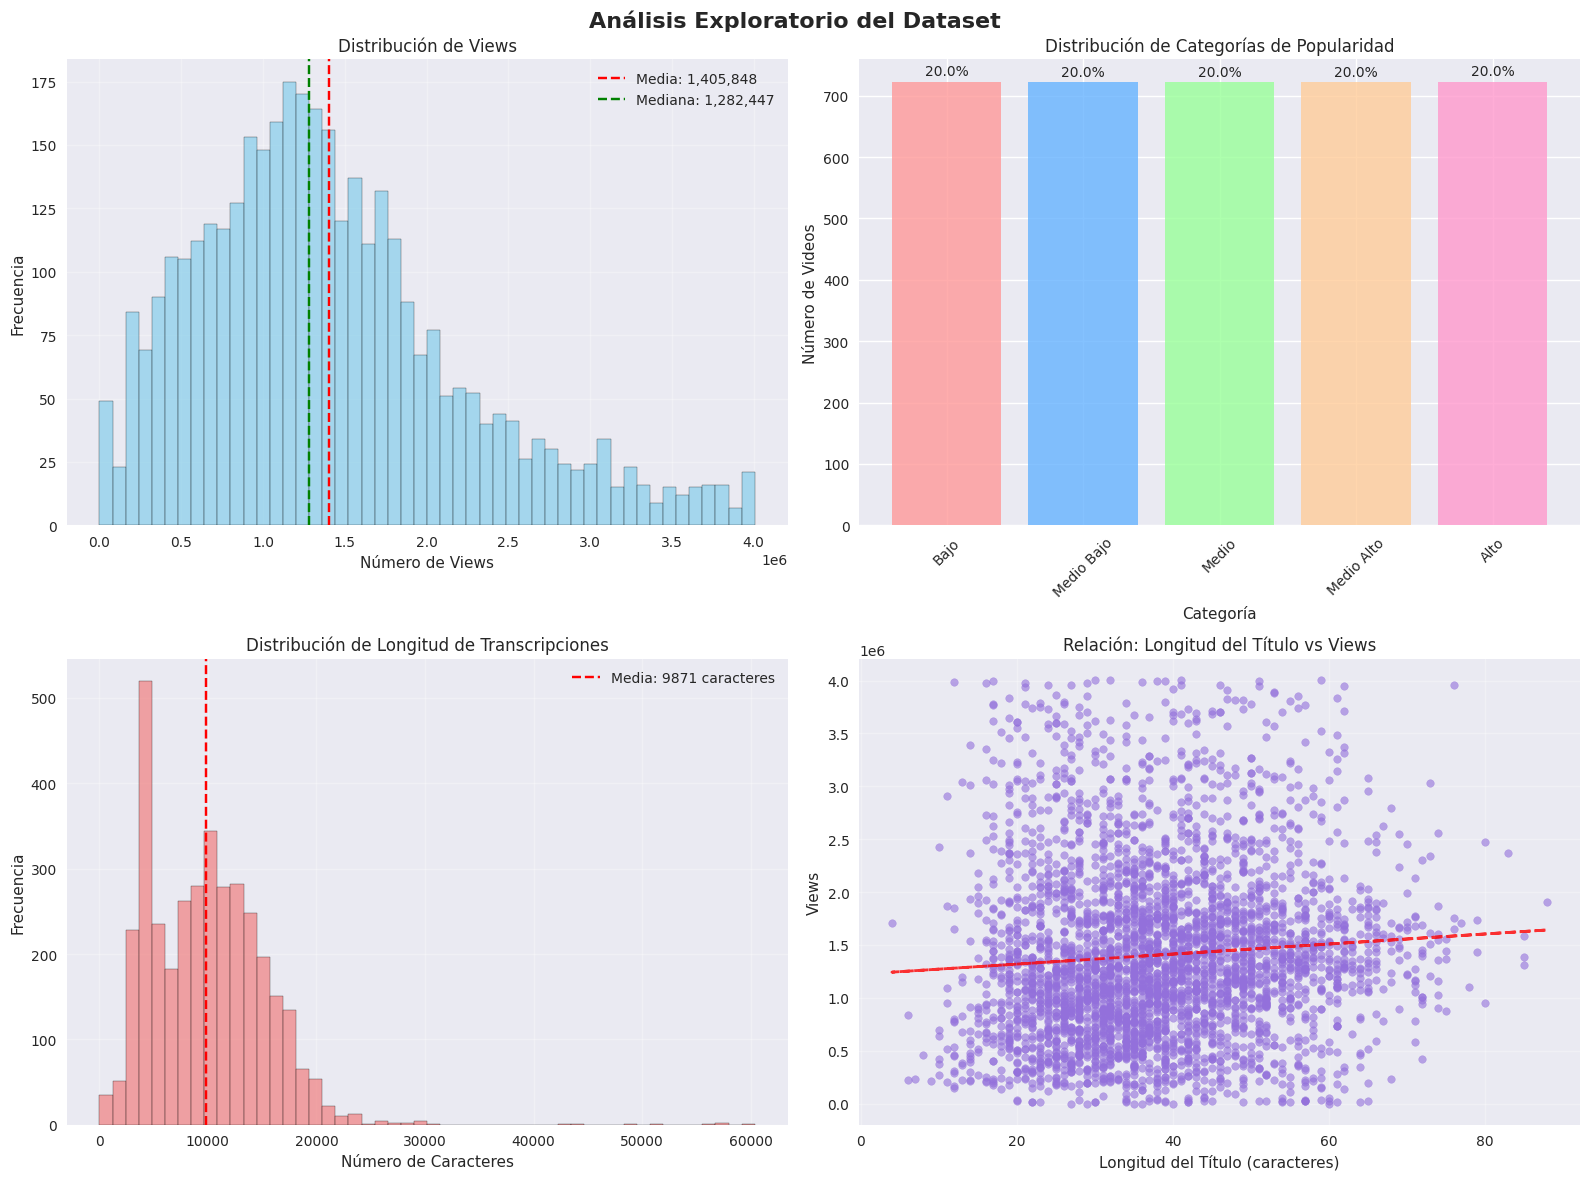

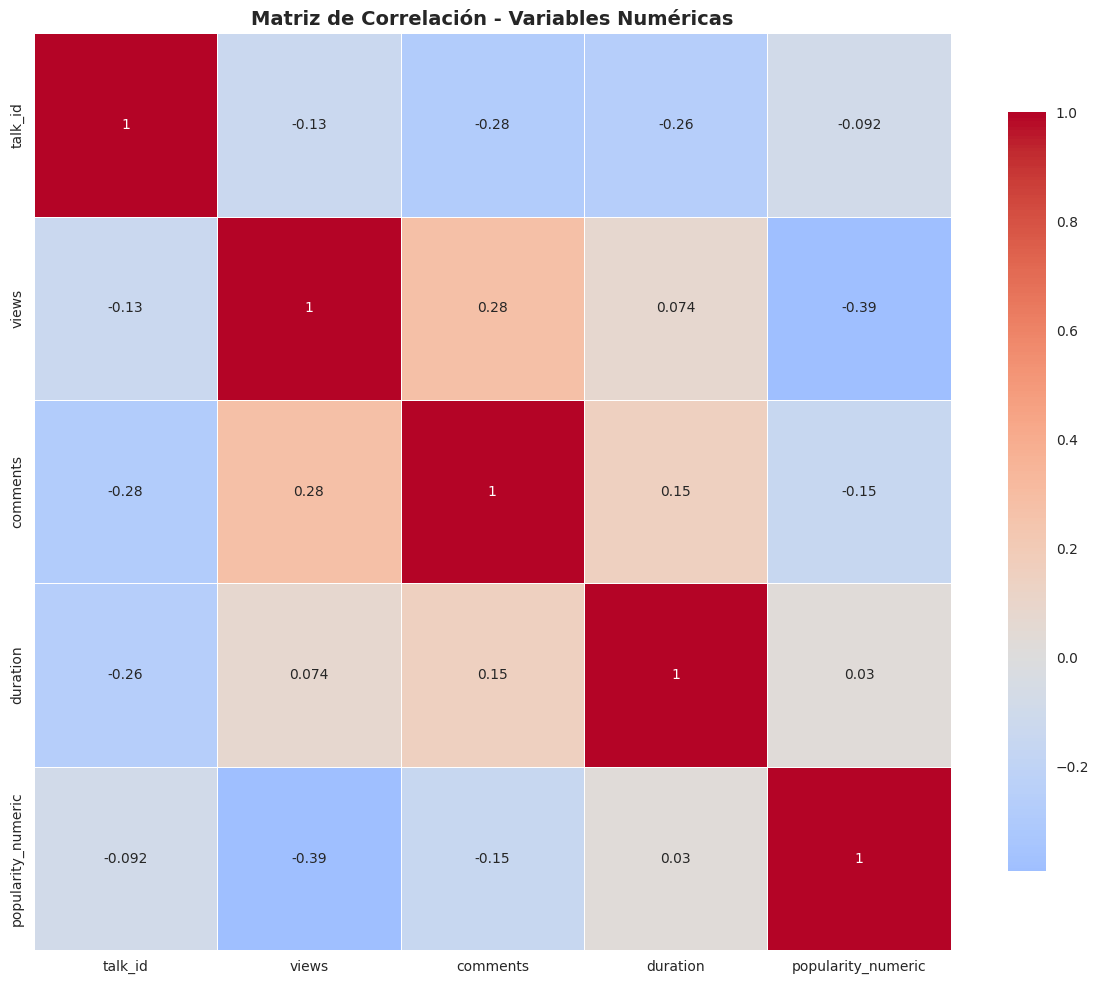

['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'views', 'recorded_date', 'published_date', 'event', 'native_lang', 'available_lang', 'comments', 'duration', 'topics', 'related_talks', 'url', 'description', 'transcript', 'title_clean', 'description_clean', 'transcript_clean', 'popularity_category', 'popularity_numeric', 'sentiment_polarity', 'sentiment_subjectivity', 'sentiment_label', 'sentiment_vader_compound', 'sentiment_vader_positive', 'sentiment_vader_negative', 'sentiment_vader_neutral', 'sentiment_agreement', 'text_word_count', 'text_sentence_count', 'text_avg_word_length', 'text_unique_words', 'text_lexical_diversity', 'text_exclamation_count', 'text_question_count', 'text_uppercase_ratio', 'person_count', 'org_count', 'gpe_count', 'money_count', 'date_count', 'time_count', 'percent_count', 'quantity_count']


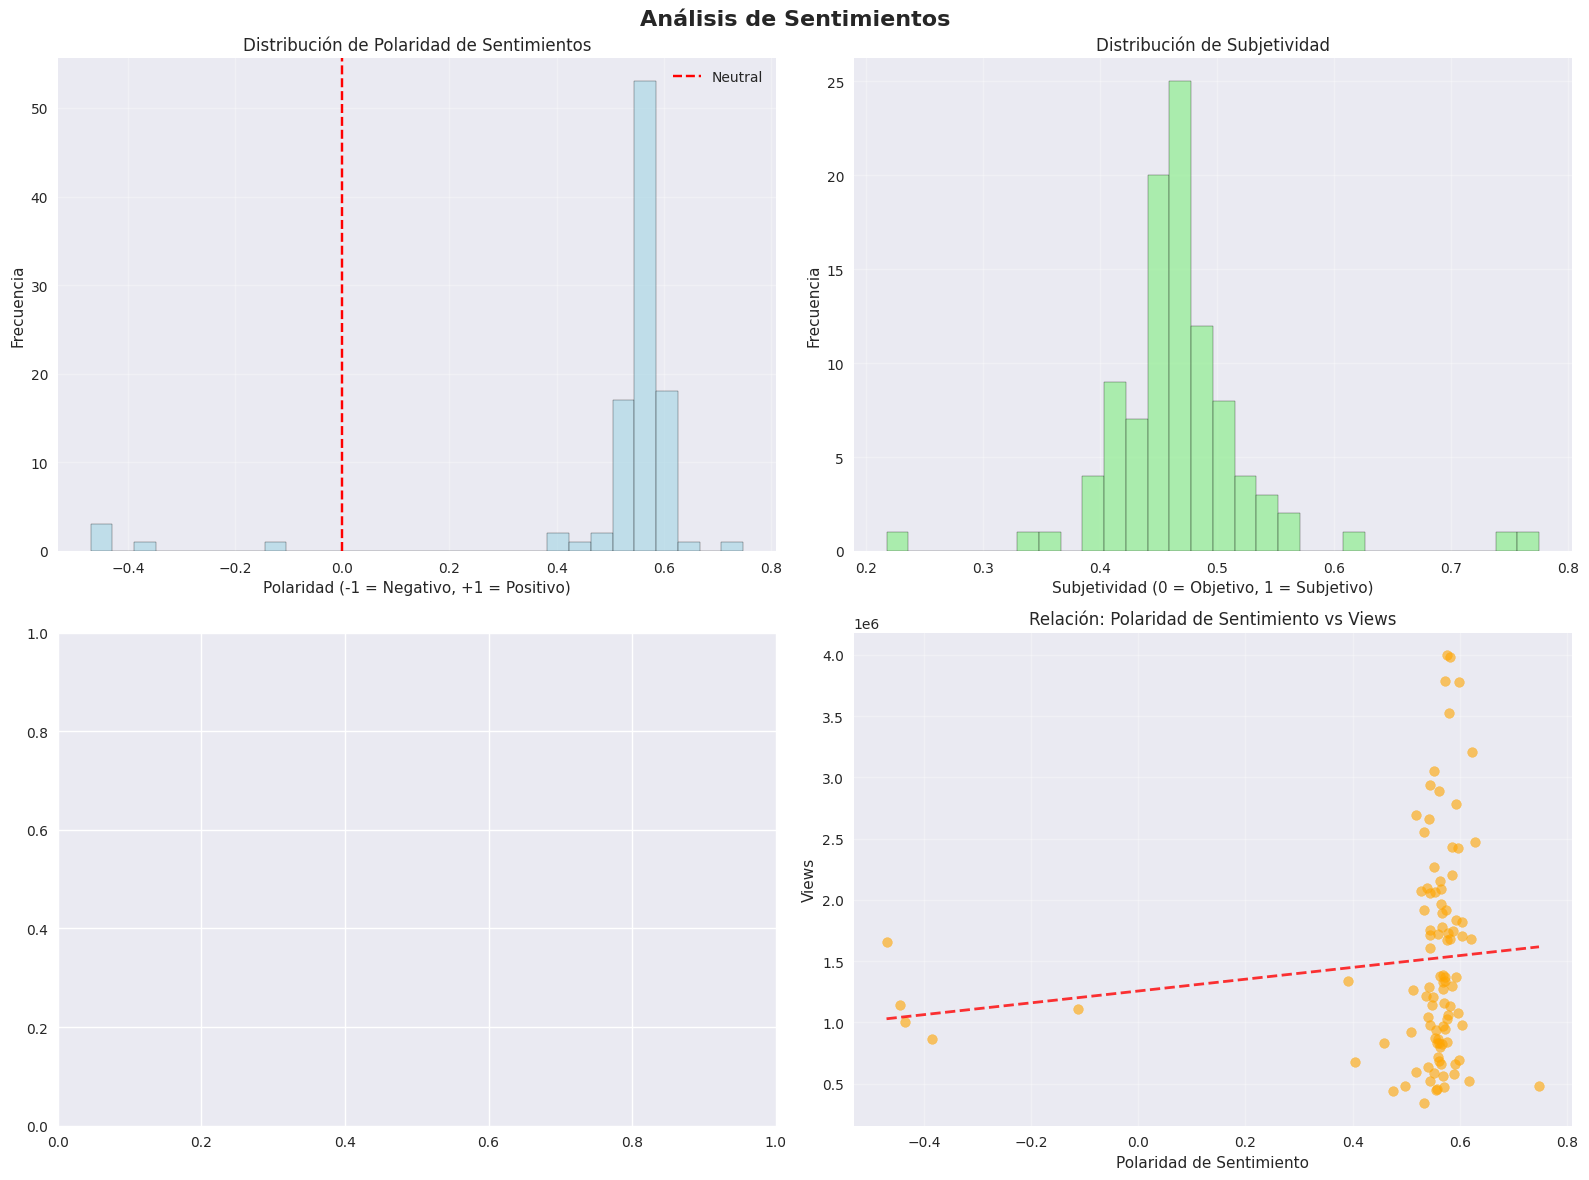

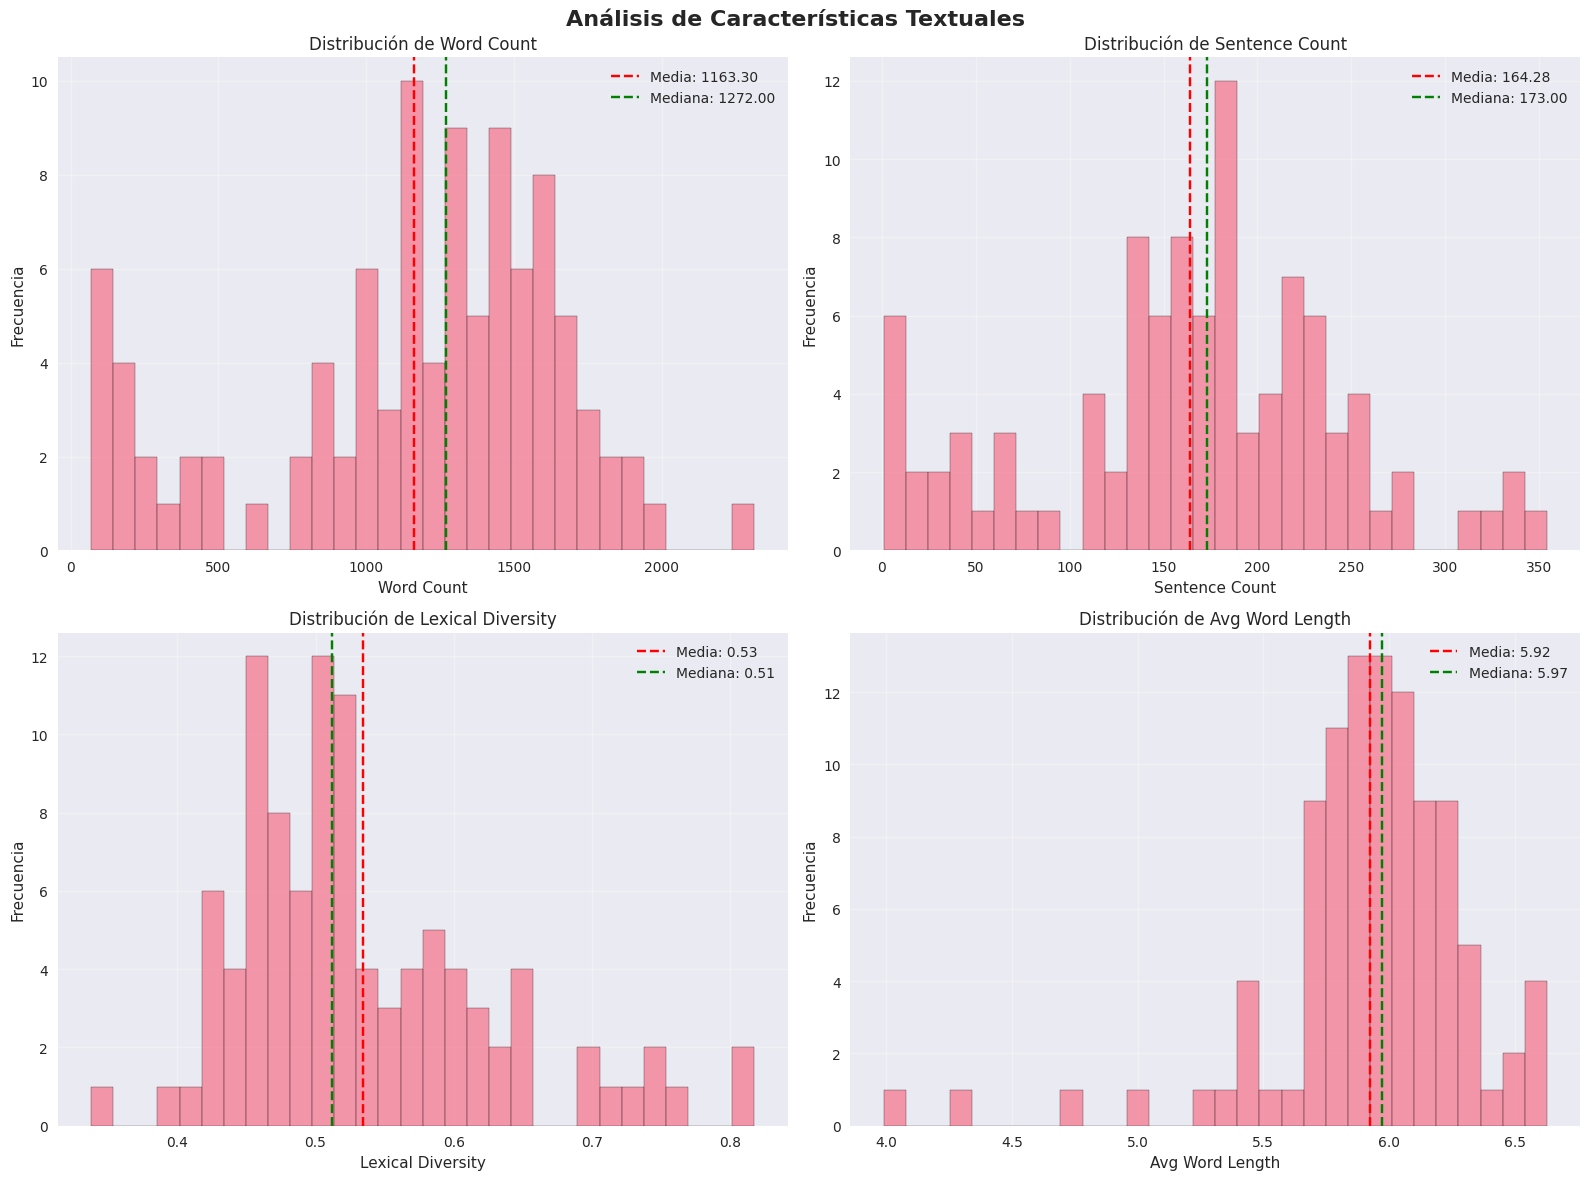

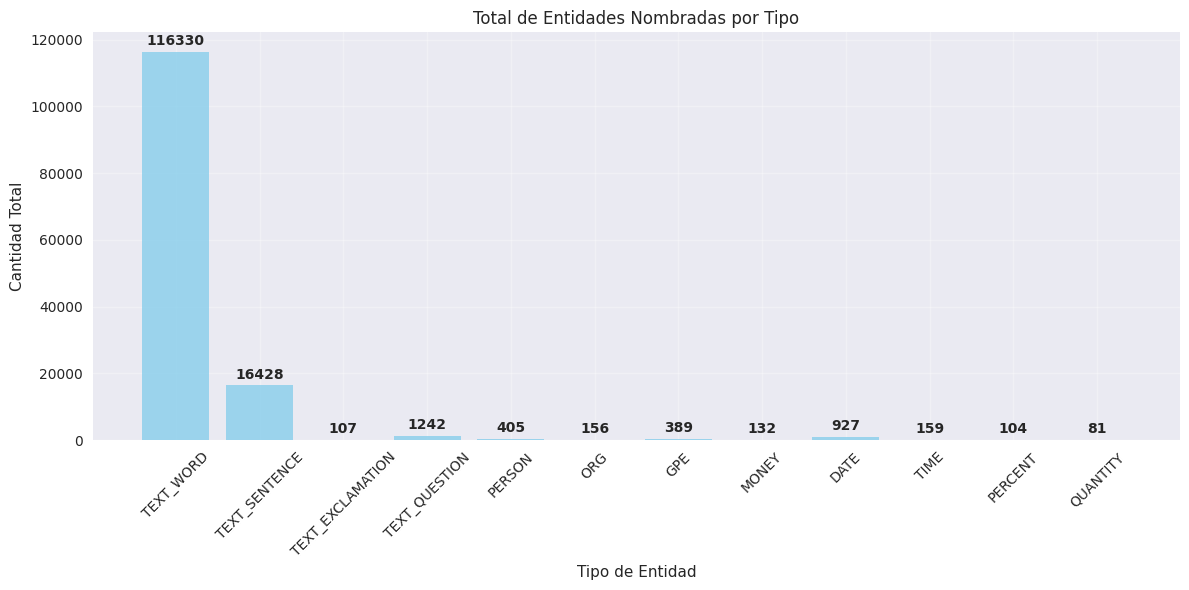

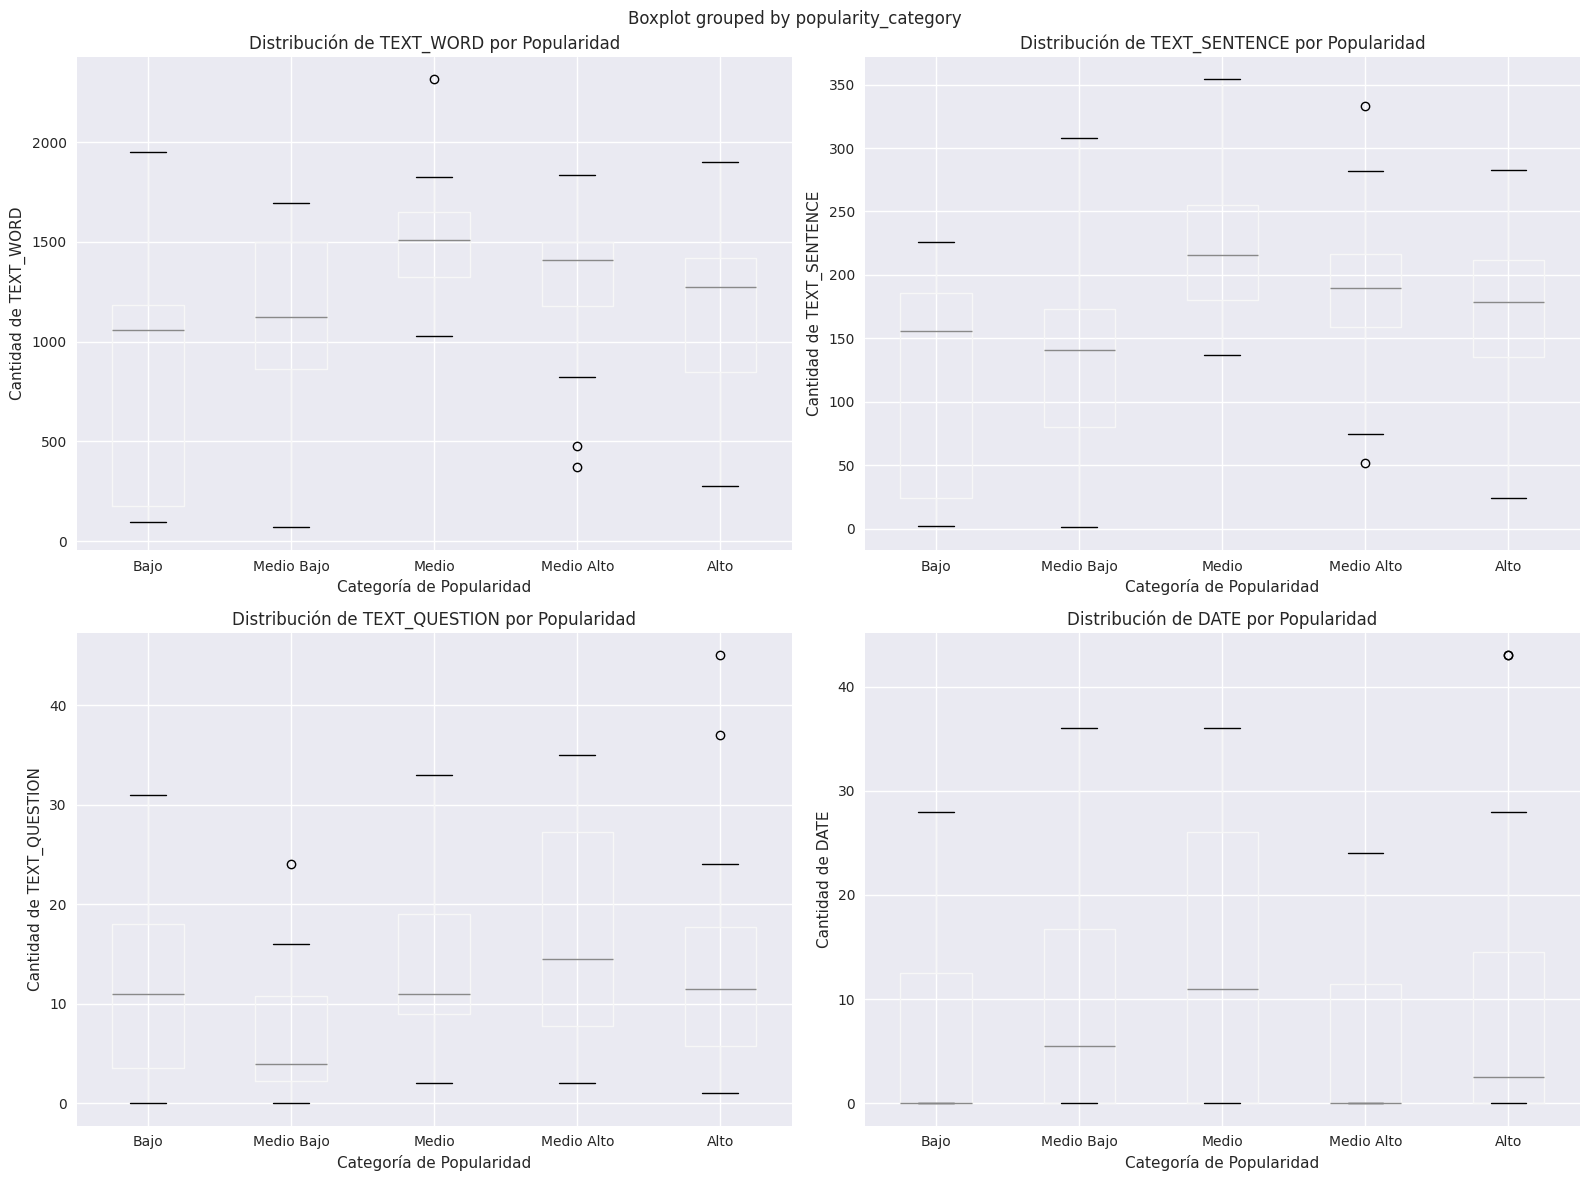

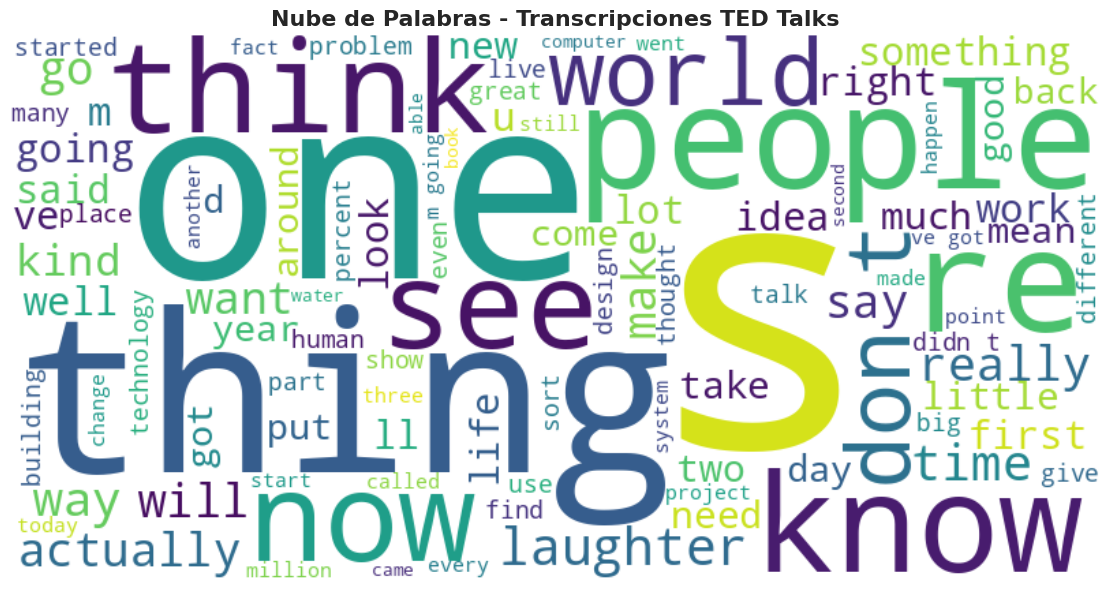

✓ Visualizaciones creadas correctamente

Visualizaciones creadas exitosamente:

Tipos de visualizaciones disponibles:
  - Distribucion de datos
  - Correlaciones entre variables
  - Metricas de modelos ML
  - Matrices de confusion
  - Comparacion de rendimiento

Analisis completo finalizado


In [8]:
# === METRICAS DE RENDIMIENTO Y VISUALIZACIONES ===

print("Generando metricas de rendimiento y visualizaciones...")

# Crear visualizaciones usando el metodo del analizador
analyzer.create_visualizations()

# Mostrar informacion sobre las visualizaciones creadas
if 'visualizations' in analyzer.results:
    print("\nVisualizaciones creadas exitosamente:")
    
    # Si hay un clasificador disponible, mostrar importancia de caracteristicas
    if hasattr(analyzer, 'best_model_name') and 'machine_learning' in analyzer.results:
        models_trained = analyzer.results['machine_learning']['models_trained']
        
        print(f"\nImportancia de caracteristicas del mejor modelo ({analyzer.best_model_name}):")
        try:
            feature_importance = models_trained.get_feature_importance(analyzer.best_model_name, top_n=10)
            for i, (feature, importance) in enumerate(feature_importance, 1):
                print(f"  {i:2d}. {feature}: {importance:.4f}")
        except Exception as e:
            print(f"  No se pudo obtener importancia de caracteristicas: {e}")
    
    print("\nTipos de visualizaciones disponibles:")
    print("  - Distribucion de datos")
    print("  - Correlaciones entre variables")
    print("  - Metricas de modelos ML")
    print("  - Matrices de confusion")
    print("  - Comparacion de rendimiento")
else:
    print("ERROR: No se pudieron crear las visualizaciones")

print("\nAnalisis completo finalizado")